<a href="https://colab.research.google.com/github/Tarunthippineni/Built-a-Computational-Neural-Network/blob/main/EXP6(iii).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

train_dir = '/content/drive/MyDrive/Projects/DEEPLEARNING/deeplearning/Train'
test_dir = '/content/drive/MyDrive/Projects/DEEPLEARNING/deeplearning/Test'

In [ ]:
path = '/content/drive/MyDrive/Projects/DEEPLEARNING/deeplearning'
classes = os.listdir(path)
classes


['Train', 'Test']

In [ ]:
batch_size = 32
img_height = 150
img_width = 150
epochs = 10

In [ ]:
train_datagen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True
)


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(img_height, img_width),
batch_size=batch_size,
class_mode='binary'
)


Found 1000 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(img_height, img_width),
batch_size=batch_size,
class_mode='binary'
)


Found 600 images belonging to 2 classes.


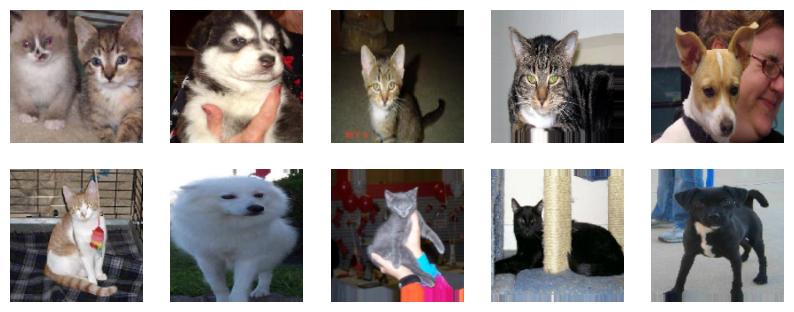

In [ ]:
x_train, y_train = train_generator.next()
plt.figure(figsize=(10, 10))
for i in range(10):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[i])
  plt.axis('off')
plt.show()

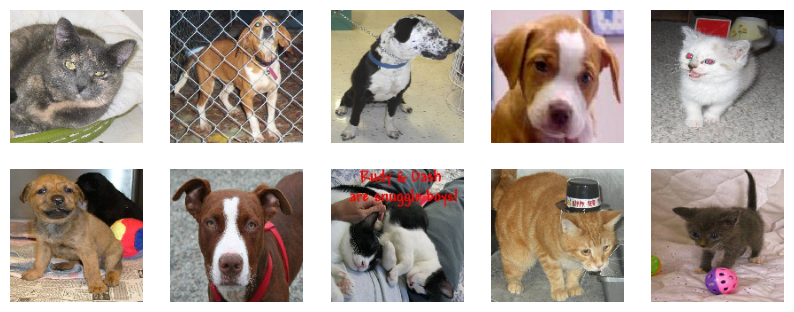

In [ ]:
x_val, y_val = validation_generator.next()
plt.figure(figsize=(10, 10))
for i in range(10):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_val[i])
  plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers
model = Sequential([
Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01), input_shape=(150, 150, 3)),
MaxPooling2D(2, 2),
BatchNormalization(),
Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
MaxPooling2D(2, 2),
BatchNormalization(),
Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
MaxPooling2D(2, 2),
BatchNormalization(),
Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
MaxPooling2D(2, 2),
BatchNormalization(),
Flatten(),
Dropout(0.5), # Adding dropout with a rate of 0.5
Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 74, 74, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                        

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
train_generator,
steps_per_epoch=train_generator.samples // batch_size,
epochs=epochs,
validation_data=validation_generator,
validation_steps=validation_generator.samples // batch_size
)


Epoch 1/10
31/31 [==============================] - 289s 9s/step - loss: 254.6108 - accuracy: 0.5867 - val_loss: 76.3276 - val_accuracy: 0.5035
Epoch 2/10
31/31 [==============================] - 48s 2s/step - loss: 43.9675 - accuracy: 0.6209 - val_loss: 21.6792 - val_accuracy: 0.4983
Epoch 3/10
31/31 [==============================] - 47s 2s/step - loss: 14.3494 - accuracy: 0.6209 - val_loss: 10.1119 - val_accuracy: 0.4948
Epoch 4/10
31/31 [==============================] - 47s 2s/step - loss: 8.5221 - accuracy: 0.6043 - val_loss: 7.4468 - val_accuracy: 0.4965
Epoch 5/10
31/31 [==============================] - 44s 1s/step - loss: 6.7644 - accuracy: 0.5548 - val_loss: 5.9325 - val_accuracy: 0.4983
Epoch 6/10
31/31 [==============================] - 47s 1s/step - loss: 5.3789 - accuracy: 0.5764 - val_loss: 4.8701 - val_accuracy: 0.4948
Epoch 7/10
31/31 [==============================] - 47s 1s/step - loss: 4.7219 - accuracy: 0.5744 - val_loss: 4.6299 - val_accuracy: 0.4931
Epoch 8/10
3

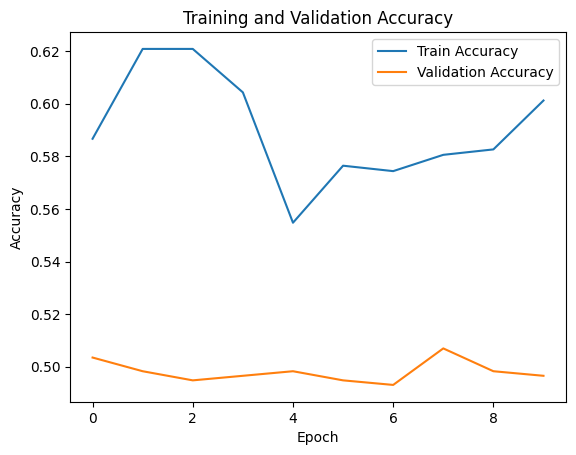

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
train_loss, train_accuracy = model.evaluate(train_generator)
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

19/19 [==============================] - 8s 411ms/step - loss: 4.5339 - accuracy: 0.5000
Train Accuracy: 0.5
Test Accuracy: 0.5


1/1 [==============================] - 0s 25ms/step
Predicted: Cat


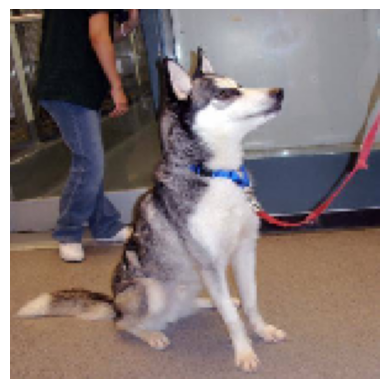

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
# Function to check one image
def check_image(image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("Predicted: Dog")
    else:
        print("Predicted: Cat")

    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/content/drive/MyDrive/Projects/DEEPLEARNING/deeplearning/Test/Dog/dog.4001.jpg'
check_image(image_path)